In [17]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [18]:
tomato_data=pd.read_csv(r"C:\Users\shilp\Downloads\Tomatofinall.csv")
tomato_data.info()
tomato_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35546 entries, 0 to 35545
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Sl no.        35546 non-null  int64 
 1   DistrictName  35546 non-null  object
 2   MarketName    35546 non-null  object
 3   Commodity     35546 non-null  object
 4   Variety       35546 non-null  object
 5   Grade         35546 non-null  object
 6   min_price     35546 non-null  int64 
 7   max_price     35546 non-null  int64 
 8   modal_price   35546 non-null  int64 
 9   PriceDate     35546 non-null  object
dtypes: int64(4), object(6)
memory usage: 2.7+ MB


,Sl no.,DistrictName,MarketName,Commodity,Variety,Grade,min_price,max_price,modal_price,PriceDate
0,1,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,09-Dec-20
1,2,Hassan,Arasikere,Tomato,Tomato,FAQ,1000,1000,1000,20-Nov-20
2,3,Hassan,Arasikere,Tomato,Tomato,FAQ,750,750,750,07-Apr-20
3,4,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,12-Mar-20
4,5,Hassan,Arasikere,Tomato,Tomato,FAQ,1500,1500,1500,06-Mar-20


In [19]:
print("Number of tomato Markets:", len(tomato_data['MarketName'].unique()))
print("Number of Districts:", len(tomato_data['DistrictName'].unique()))
#print("Number of States:", len(tomato_data['state'].unique()))
print("Number of Varieties:", len(tomato_data['Variety'].unique()))


Number of tomato Markets: 59
Number of Districts: 20
Number of Varieties: 2


In [20]:
min_price=list(tomato_data.min_price)
max_price =list(tomato_data.max_price)
model_price =list(tomato_data.modal_price)
arr =[list(tomato_data.MarketName),list(tomato_data.DistrictName), list(tomato_data.Variety)]
index =pd.MultiIndex.from_arrays(arr, names=('MarketName','DistrictName','Variety'))
tomato_df = pd.DataFrame({'minimum_price':min_price,'maximum_price':max_price,'modal_price':model_price}, index=index)
tomato_df.head()

minimum_price  maximum_price  modal_price
MarketName DistrictName Variety                                           
Arasikere  Hassan       Tomato            1000           1000         1000
                        Tomato            1000           1000         1000
                        Tomato             750            750          750
                        Tomato            1500           1500         1500
                        Tomato            1500           1500         1500

In [21]:
tomato_df2=tomato_df.groupby(level=2,sort=False).mean().reset_index()
tomato_df2.head()

,Variety,minimum_price,maximum_price,modal_price
0,Tomato,849.111479,1550.965048,1210.563664
1,Hybrid,850.508102,1542.611690,1193.706597


In [22]:
print("national average modal price of tomato:", round(tomato_df2['modal_price'].mean()))

national average modal price of tomato: 1202


In [23]:
tomato_df2[tomato_df2['modal_price']>1669]

,Variety,minimum_price,maximum_price,modal_price


In [24]:
tomato_df2[tomato_df2['modal_price']<1669].sort_values('modal_price',ascending=True)[0:5]

,Variety,minimum_price,maximum_price,modal_price
1,Hybrid,850.508102,1542.611690,1193.706597
0,Tomato,849.111479,1550.965048,1210.563664


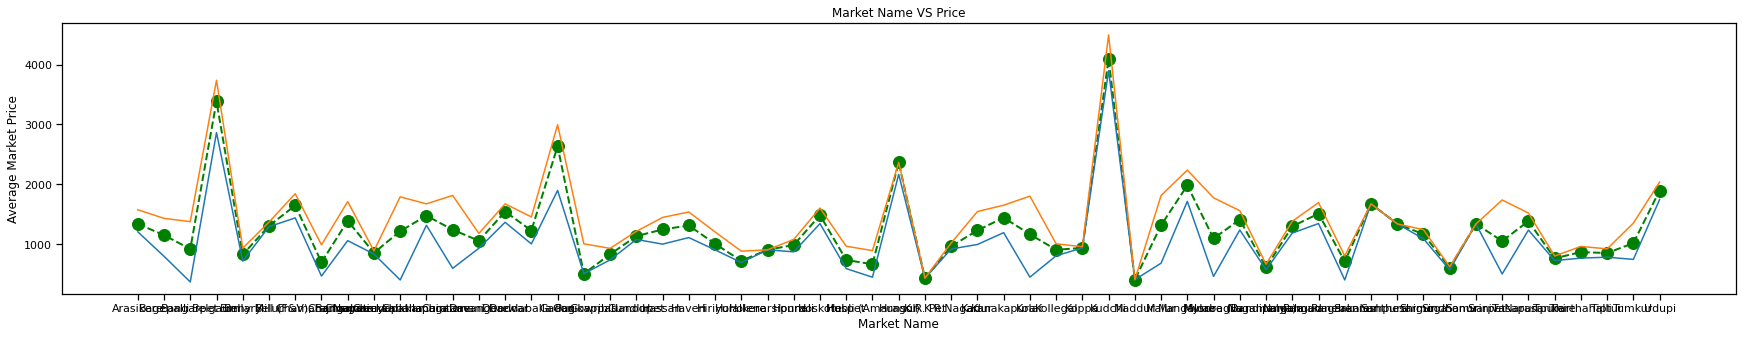

In [25]:
tomato_df3=tomato_df.groupby(level=0).mean().reset_index()

plt.figure(figsize=(30,5))
sns.set_context("notebook", font_scale=1)
plt.plot(potato_df3['MarketName'],potato_df3['modal_price'],color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.plot(potato_df3['MarketName'],potato_df3['minimum_price'])
plt.plot(potato_df3['MarketName'],potato_df3['maximum_price'])
plt.title("Market Name VS Price")
plt.xlabel("Market Name")
plt.ylabel("Average Market Price")
plt.show()


In [26]:
tomato_df3.sort_values('modal_price',ascending=False)[0:5]

,MarketName,minimum_price,maximum_price,modal_price
37,Kudchi,3900.000000,4500.000000,4100.000000
3,Belgaum,2864.130435,3739.130435,3385.869565
16,Gadag,1894.827586,2993.965517,2634.482759
29,Hunsur,2164.285714,2364.551020,2364.551020
40,Mangalore,1711.111111,2235.555556,1978.888889


In [27]:
tomato_df3.sort_values('modal_price')[0:5]

,MarketName,minimum_price,maximum_price,modal_price
38,Maddur,400.000000,400.000000,400.000000
30,K.R. Pet,423.075676,425.589189,423.978378
17,Gonikappal,500.000000,1000.000000,500.000000
50,Sindhanur,564.000000,616.666667,600.000000
43,Nagamangala,566.292906,657.924485,605.510297


In [28]:
print("Expensive tomato producing states:",tomato_data[(potato_data.Variety=='Desi')|(potato_data.Variety=='Local')])

Expensive tomato producing states: Empty DataFrame
Columns: [Sl no., DistrictName, MarketName, Commodity, Variety, Grade, min_price, max_price, modal_price, PriceDate]
Index: []


In [29]:
#print("Low cost tomato producing states:",tomato_data[(tomato_data.variety=='Puna')|(tomato_data.variety=='2nd Sort')|(tomato_data.variety=='White')|(tomato_data.variety=='Telagi')|(tomato_data.variety=='Bangalore-Samall')].state.unique())

In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_arr3 = scaler.fit_transform(tomato_data[['modal_price','min_price','max_price']])

clusters = KMeans(5,random_state=42)# we've got k=5 using elbow plot
kmeans_model= clusters.fit(scaled_arr3)
tomato_data['cluster_id']= kmeans_model.labels_
tomato_data1 = potato_data.sort_values(['modal_price','cluster_id'])
tomato_data1.head()

,Sl no.,DistrictName,MarketName,Commodity,Variety,Grade,min_price,max_price,modal_price,PriceDate,cluster_id
7558,7559,Hassan,Channarayapatna,Tomato,Tomato,FAQ,70,100,70,10-Sep-16,3
7570,7571,Hassan,Channarayapatna,Tomato,Tomato,FAQ,75,200,75,18-Aug-16,3
3295,3296,Bellary,Bellary,Tomato,Hybrid,FAQ,60,100,80,04-Apr-20,3
13746,13747,Davangere,Davangere,Tomato,Tomato,FAQ,80,110,90,13-Apr-18,3
7539,7540,Hassan,Channarayapatna,Tomato,Tomato,FAQ,100,100,100,08-Feb-17,3


In [31]:
tomato_clusters = tomato_data1.groupby('cluster_id')[['modal_price','min_price','max_price']].agg(['mean','std']).reset_index()
tomato_clusters

cluster_id   modal_price                 min_price              \
                      mean         std          mean         std   
0          0   3784.620280  890.066845   3167.441748  992.710936   
1          1   1193.536380  244.015579    808.240044  327.137561   
2          2   2204.531347  422.675120   1494.430378  595.194659   
3          3    560.510023  182.730716    374.944045  154.444173   
4          4  25000.000000    0.000000  20000.000000    0.000000   

      max_price               
           mean          std  
0   4317.137540  1569.392939  
1   1570.465720   463.027242  
2   2828.992033   781.327124  
3    749.135890   280.604217  
4  30000.000000     0.000000

C:\Users\shilp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


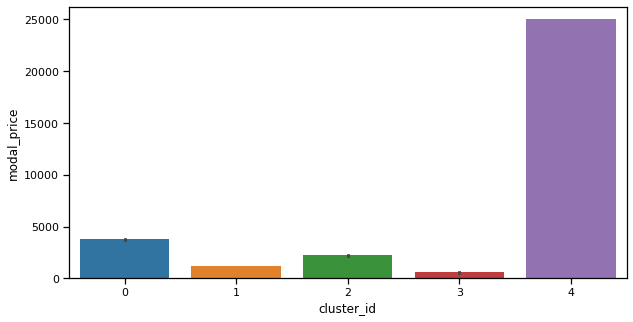

In [32]:
plt.figure(figsize=(10,5))
sns.set_context("notebook", font_scale=1)
sns.barplot(tomato_data1['cluster_id'],tomato_data1['modal_price'])
plt.show()